In [3]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving daily-bike-share.csv to daily-bike-share (1).csv


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
import io
bike_data_raw = pd.read_csv(io.BytesIO(uploaded['daily-bike-share.csv']))
bike_data_raw

In [ ]:
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
display(bike_data_raw)
print(bike_data_raw.info())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


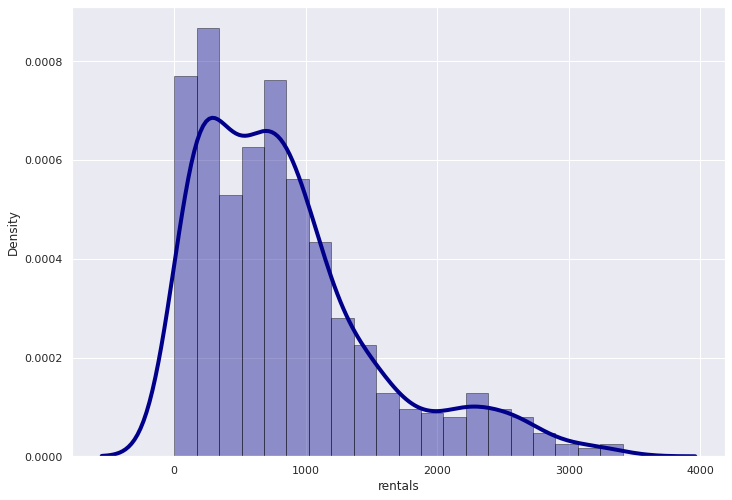

In [18]:
sns.distplot(bike_data_raw['rentals'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

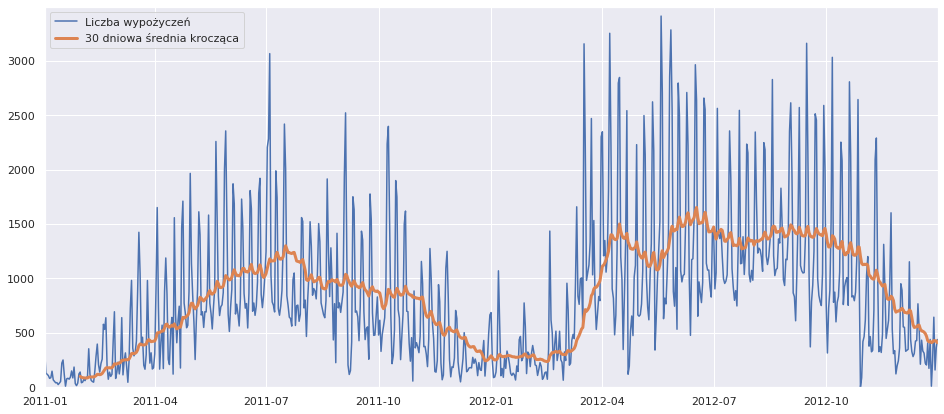

In [19]:
plt.figure(figsize=(16, 7))
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'], label='Liczba wypożyczeń')
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(30).mean(), linewidth=3.0, label='30 dniowa średnia krocząca')
plt.xlim([bike_data_raw['dteday'].min(), bike_data_raw['dteday'].max()])
plt.ylim([0, bike_data_raw['rentals'].max()*1.025])
plt.legend(loc='upper left')
plt.show()

In [20]:
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)

In [21]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'

In [ ]:
for numeric_feature in numeric_features:
    fig = plt.figure(figsize=(10, 5))
    plt.scatter(bike_data[numeric_feature], bike_data[target], alpha=0.25)
    plt.xlabel(numeric_feature)
    plt.ylabel('Bike Rentals')
    plt.title(f'rentals vs {numeric_feature}')
    plt.show()

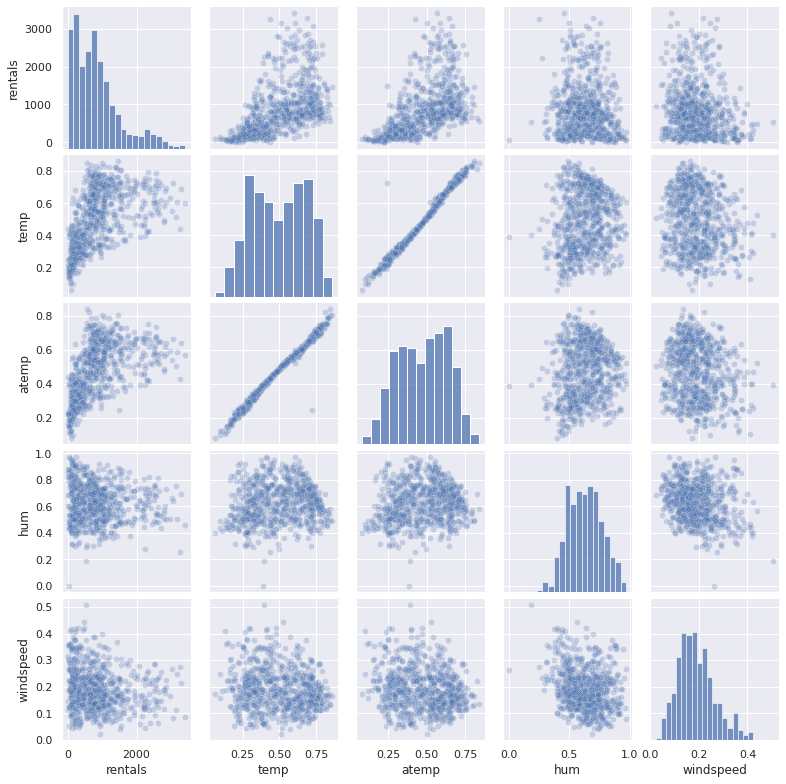

In [26]:
fig = sns.pairplot(bike_data[[target]+numeric_features], kind='scatter', plot_kws={'alpha': 0.25})
fig.fig.set_size_inches(11, 11) #ustawiamy rozmiar wykresu
plt.show()

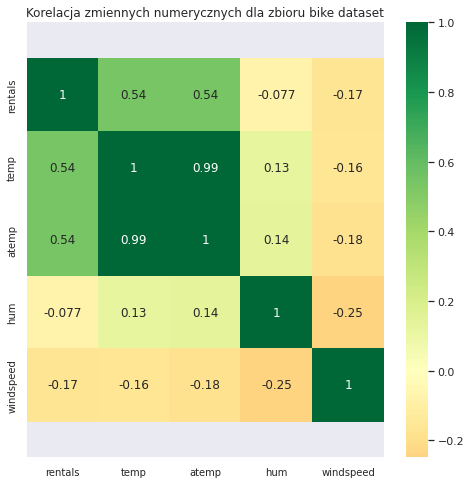

In [27]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(bike_data[[target]+numeric_features].corr(),
                 xticklabels=bike_data[[target]+numeric_features].corr().columns,
                 yticklabels=bike_data[[target]+numeric_features].corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja zmiennych numerycznych dla zbioru bike dataset', fontsize=12)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']
bike_data[['rentals', 'temp', 'difference_temp']].corr()

*   rentals – liczba wypożyczonych rowerów.
*   season – pora roku (1:wiosna, 2:lato, 3:jesień, 4:zima).
*   mnth – miesiąc (1:styczeń ... 12:Grudzień).
*   holiday – wartość binarna wskazująca, czy obserwacja została przeprowadzona w dzień świąteczny, czy nie.
*   weekday – dzień tygodnia, w którym dokonano obserwacji (0:niedziela ... 6:sobota).
*   workingday – wartość binarna wskazująca, czy dany dzień jest dniem roboczym (nie weekendem ani świętem), czy nie.
*   weathersit – wartość kategoryczna, wskazująca sytuację pogodową (1:bezchmurnie, 2:mgła/chmury, 3:lekki deszcz/śnieg, 4:ciężki deszcz/ogień/śnieg/mgła).


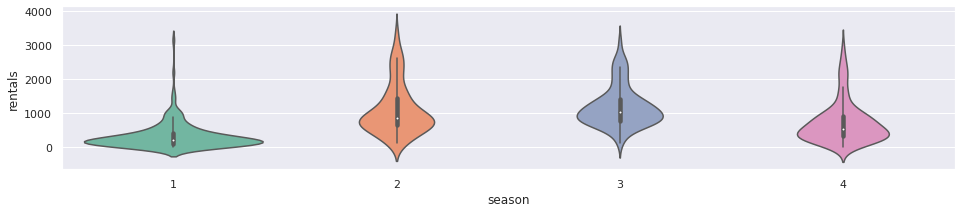

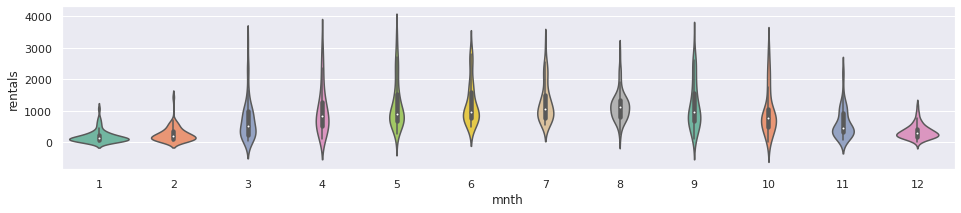

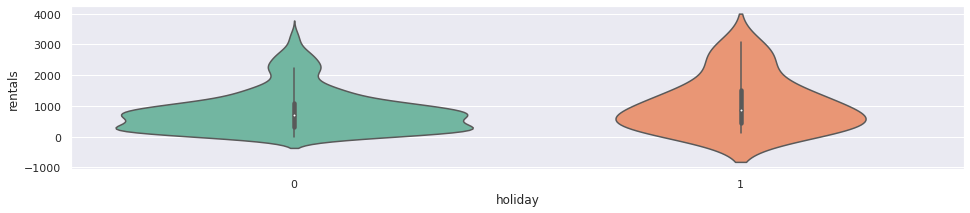

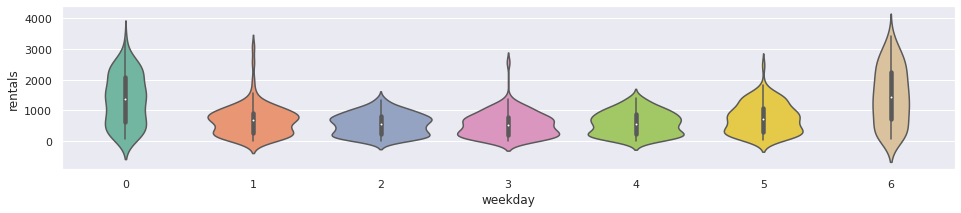

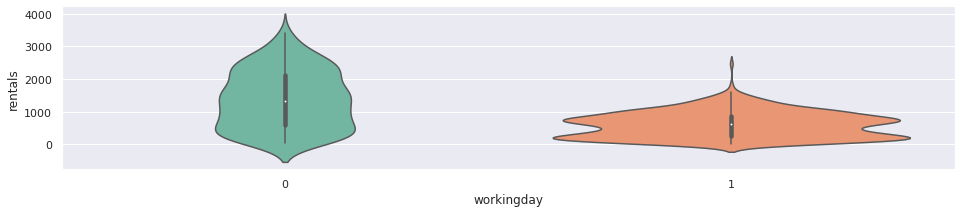

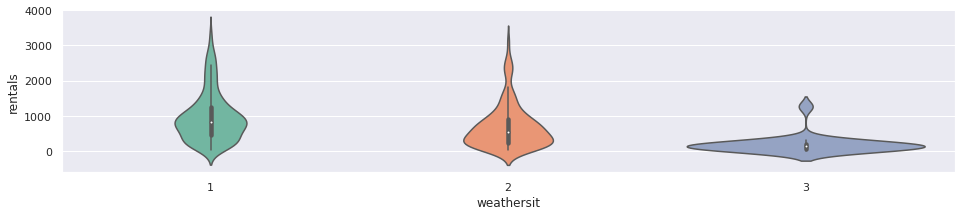

In [29]:
for categoric_features in categorical_features:
    plt.figure(figsize=(16, 3))
    sns.violinplot(y=bike_data[target], x=bike_data[categoric_features], palette="Set2")
    plt.show()

Z racji, że na kursie sporo już zostało opisane na temat tego, że ludzie wypożyczają rowery kiedy jest ciepło, skupię się na ilości wypożyczeń w dni z paskudną pogodą i okresie zimowym.

Na pierwszym wykresie, który przedstawia zależność pomiędzy ilością wypożyczeń a porą roku, możemy zaobserwować, że najwięcej dni z małą ilością wypożyczeń jest w okresie zimowym. Wskazuje to, że wypożyczalnia ma stałych klientów, dla których rower jest stałym środkiem transportu (najprawdopodobniej dojazd do pracy).

Można to również zauważyć, przyglądając się wykresom obrazującym ilość wypożyczeń w poszczególne dni tygodnia. W dni pracujące, ilość wypożyczeń trzyma się bliżej centrum wykresu. Ponadto w poniedziałki, środy i czwartki ilość outlierów jest większa niż w pozostałe dni. Całkiem możliwe, że z wypożyczalni korzystają osoby które mają ustalony plan tygodnia a rower jest dla nich wyznaczoną formą aktywności sportowej.

Potwierdza to również wykres łączący ilość wypożyczeń z dniem pracującym. W dni wolne od pracy więcej ludzi wypożycza rowery.

Fakt, że rowery są wypożyczane również w dni z niekorzystnymi warunkami pogodowymi, co widać na ostatnim wykresie, jest dodatkowym potwierdzeniem istnienia desperatów którzy muszą korzystać z tego środka transportu. Biorąc pod uwagę, że obecnie największym przymusem, jest praca, wnioskuję, że to właśnie na dojazdy do niej, są wykorzystywane rowery z wypożyczalni w kiepskie dni. Ewentualnie, ludzie mogą wypożyczać rowery na dojazdy do szkoły/uczelni. Tylko, że wypożyczalnia, najprawdopodobniej, nie oddaje rowerów za darmo. Więc, korzystają z niej osoby mające pieniądze, czyli osoby pracujące. Żeby mieć większą pewność co do tej hipotezy, przydałoby się uzyskać dane na temat wieku osób wypożyczających. Czy wypożyczalnia ma kartę stałego Klienta?